We have given the fundamental features responsible for affceting the quality of wine. We will use different ML tools to predict the quality of wine.

In [ ]:
# First we will import the required libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Dataset

In [4]:
wine=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [ ]:
# Checking the dataset and dataset information

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It shows that dataset has 1599 rows and 12 columns.

In [ ]:
# Checking for Missing values

In [7]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
print("There is no missing values in the dataset.")

There is no missing values in the dataset.


In [ ]:
# Now, checking the distribution of data columns in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

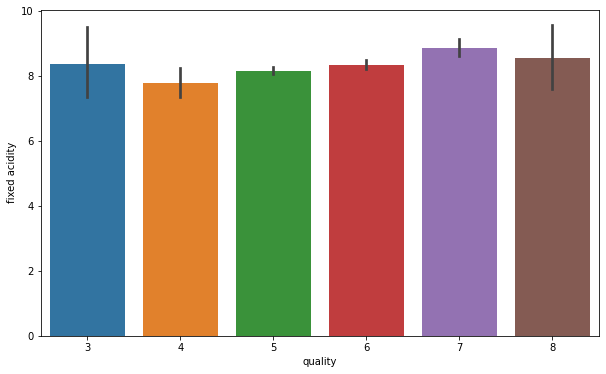

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='fixed acidity', data = wine)

Here, in the plot above we can see that there no significant affect of fixed acidity on the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

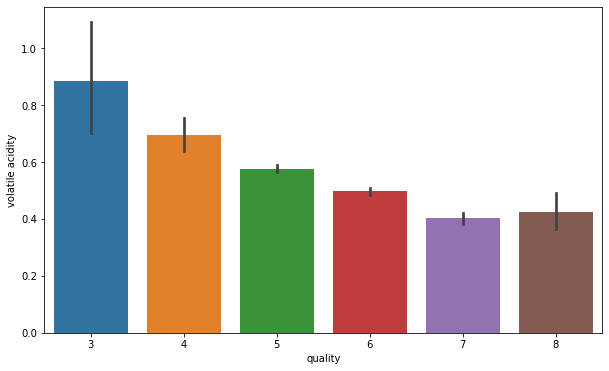

In [10]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='volatile acidity', data = wine)

In this plot, we can observe that higher the volatile acidity, lower the quality of the wine; down trend

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

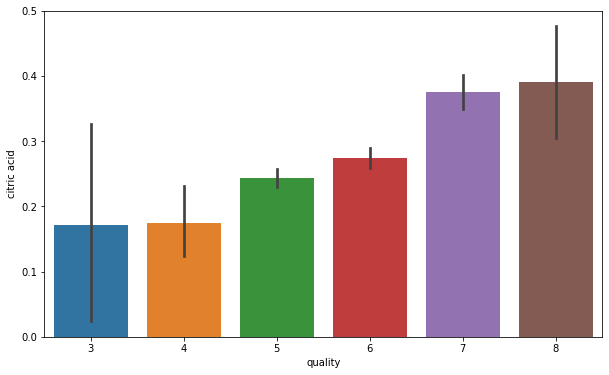

In [11]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='citric acid', data = wine)

Here, we can observe that the higher the citric acid higher the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

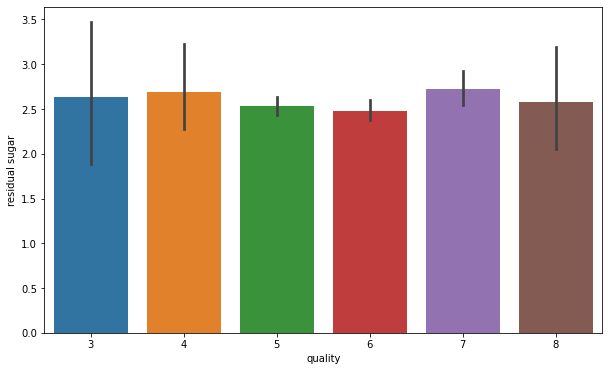

In [13]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='residual sugar', data = wine)

There is no specific trend in the above plot.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

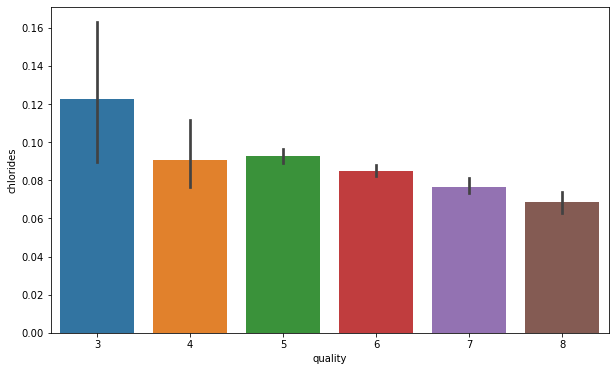

In [14]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='chlorides', data = wine)

In [ ]:
From above plot we can read that chlorides makes the quality of the wine down.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

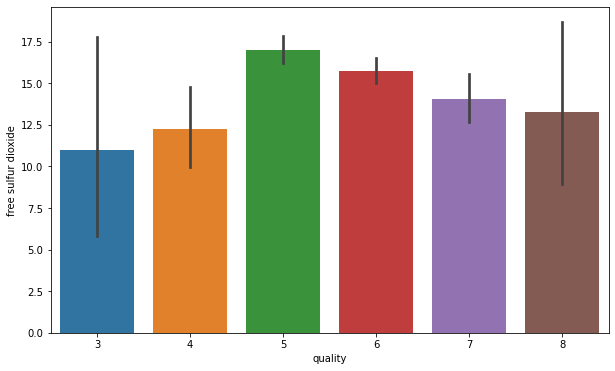

In [15]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='free sulfur dioxide', data = wine)

Almost normaly distributed.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

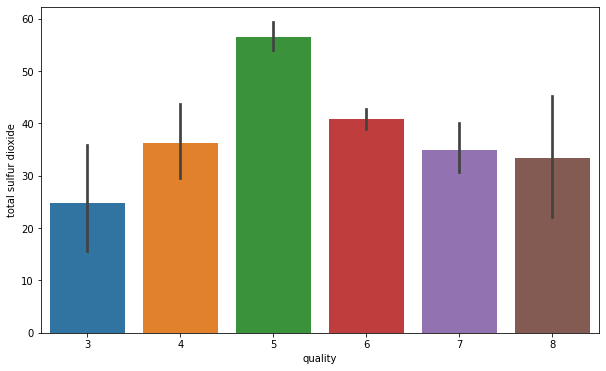

In [16]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='total sulfur dioxide', data = wine)

It seems nomally distributed.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

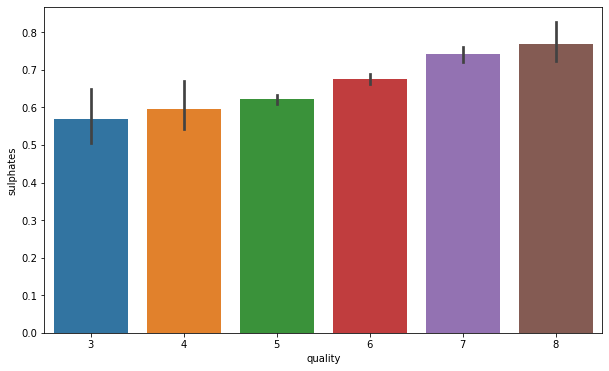

In [17]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='sulphates', data = wine)

Higher quality wine contains higher amount of sulphate.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

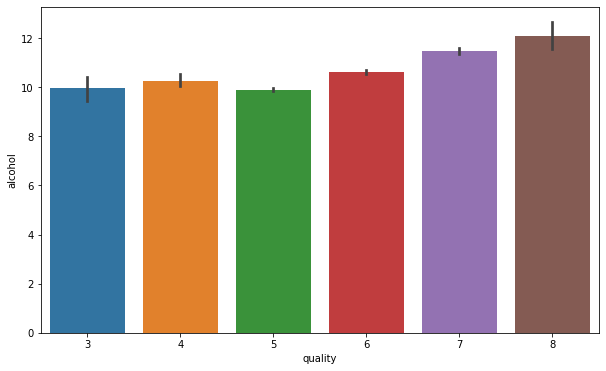

In [18]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x ='quality', y ='alcohol', data = wine)

Alcohol level goes higher as the quality of wine increases.

In [ ]:
# Correlation matrix for better understanding of correlation between variables

In [19]:
correlation=wine.corr()

In [ ]:
# Heatmap construction

<AxesSubplot:>

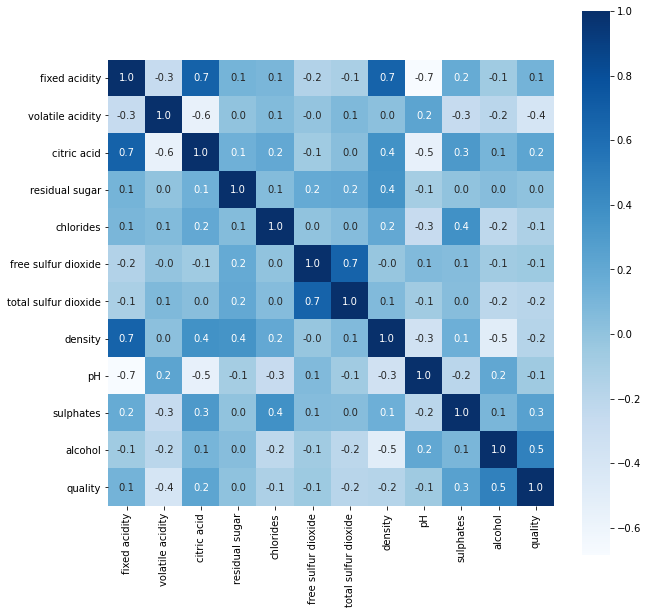

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')

This map shows the relationship between variables at a glimpse.

In [ ]:
# Data Preprocessing

Binarizing the quality of wine (response variable) as good(quality value>=7) or bad(quality value<7)

In [ ]:
#separating the data and label

In [22]:
X=wine.drop('quality',axis=1)

In [23]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# Label Binarization ; good=1 and bad=0

In [24]:
Y=wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Splitting data into training and test datasets

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# creating 4 variables

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)  
# 20% data of the original dataset is taken as test dataset/ random state tells the part of the data.

In [31]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


It means we have total 1599 values out of which 1279 values we are using as training and 320 values are using as test.

In [32]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()

In [33]:
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

Our training and testing data is ready for ML :-

Model Training:
   1. Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc= RandomForestClassifier()

In [39]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
# Accuracy Score of the model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.90625


Model Training:
    2. Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, Y_train)
X_test_pred = dtc.predict(X_test)

In [49]:
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       279
           1       0.54      0.49      0.51        41

    accuracy                           0.88       320
   macro avg       0.73      0.71      0.72       320
weighted avg       0.88      0.88      0.88       320



Here we can see that DecisionTreeClassifier has the lower accuracy score as compared to RandomForestClassifier.

In [ ]:
# Feature Importance :

In [51]:
X_features = X
X = StandardScaler().fit_transform(X)

<AxesSubplot:>

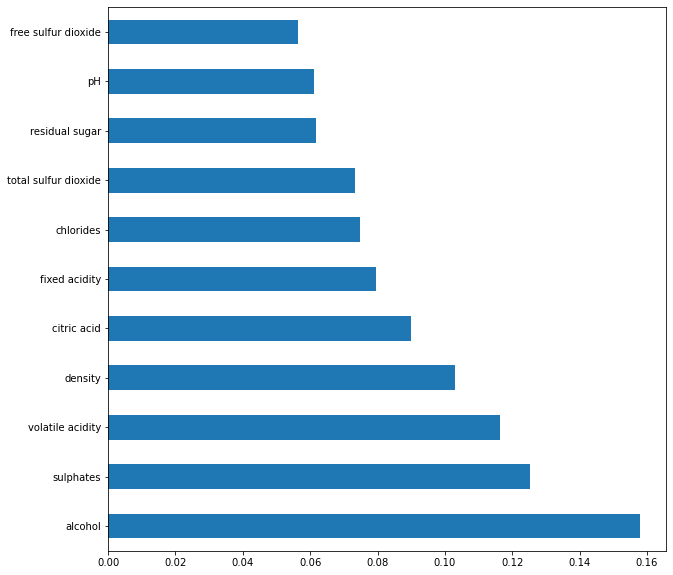

In [52]:
feat_importances = pd.Series(rfc.feature_importances_, index = X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

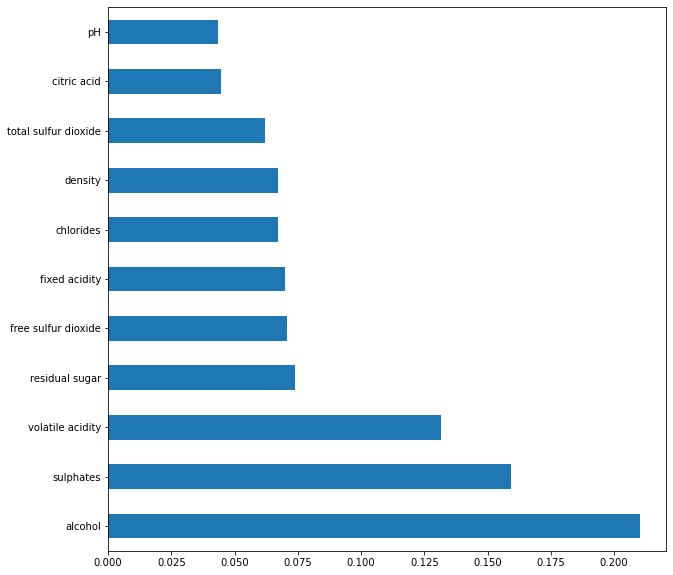

In [53]:
feat_importance = pd.Series(dtc.feature_importances_, index = X_features.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

From above we observe that good quality wines have higher levels of alcohol and sulphates.